In [176]:
import pandas as pd, numpy as np
from datetime import date
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Pull out prices into csv
import eikon as ek, cufflinks as cf, configparser as cp

cf.set_config_file(offline=True)
cfg = cp.ConfigParser()
cfg.read('eikon.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

# Read data from Eikon
data_ts = ek.get_timeseries('XAU=',  # the RIC for Apple, Inc.
                         fields='CLOSE',  # all fields
                         start_date='2010-01-01',  # start date
                         end_date=date.isoformat(date.today()),
                           interval='weekly')  # end date
data_ts[::-1].to_csv("data/gold.csv")

In [99]:
# Read data
raw = pd.read_csv("data/prices.csv")

df = raw.copy()
df['date'] = pd.to_datetime(df.date)
df = pd.concat([df['date'], df.drop('date', axis = 1).pct_change(-1)], axis = 1)
df

,date,UST,SPX,XAU
0,2020-02-14,0.012204,0.015762,0.009182
1,2020-07-02,-0.002120,0.031682,-0.012523
2,2020-01-31,0.004556,-0.021226,0.012386
3,2020-01-24,0.014827,-0.010256,0.009086
4,2020-01-17,0.002237,0.019682,-0.003718
...,...,...,...,...
449,2011-08-07,0.023032,0.003083,0.038902
450,2011-01-07,-0.034347,0.056147,-0.010432
451,2011-06-24,0.012254,-0.002399,-0.025244
452,2011-06-17,0.021989,0.000409,0.005948


In [173]:
def pf_std(weights, df_returns):
    return np.sqrt(np.matmul(np.matmul(weights, np.array(df_returns.cov())), weights.transpose()))

def sim_pf_std(list_of_weights, df_returns):
    return np.array(list(map(lambda w: pf_std(w, df_returns), list_of_weights)))

In [174]:
def pf_ret(weights, df_returns):
    return (weights * df_returns.mean()).sum()

def sim_pf_ret(list_of_weights, df_returns):
    return np.array(list(map(lambda w: pf_ret(w, df_returns), list_of_weights)))

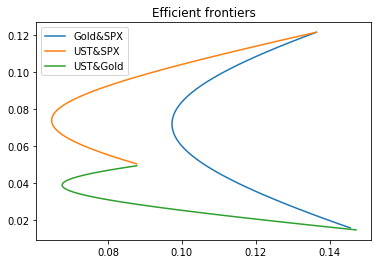

In [189]:
# Two asset efficient frontier
wt_2d = np.array([[x, 1-x] for x in np.arange(0, 1, 0.01)])
std_gold_spx = sim_pf_std(wt_2d, df_ret[['XAU', 'SPX']]) * np.sqrt(52)
ret_gold_spx = sim_pf_ret(wt_2d, df_ret[['XAU', 'SPX']]) * 52

std_ust_spx = sim_pf_std(wt_2d, df_ret[['UST', 'SPX']]) * np.sqrt(52)
ret_ust_spx = sim_pf_ret(wt_2d, df_ret[['UST', 'SPX']]) * 52

std_ust_gold = sim_pf_std(wt_2d, df_ret[['UST', 'XAU']]) * np.sqrt(52)
ret_ust_gold = sim_pf_ret(wt_2d, df_ret[['UST', 'XAU']]) * 52

plt.title('Efficient frontiers')
plt.plot(std_gold_spx, ret_gold_spx)
plt.plot(std_ust_spx, ret_ust_spx)
plt.plot(std_ust_gold, ret_ust_gold)
plt.legend(['Gold&SPX', 'UST&SPX', 'UST&Gold'])
